In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [2]:
train_dataset = pd.read_csv('data/train.csv')
test_dataset = pd.read_csv('data/test.csv')

In [3]:
# Check for missing values
print(train_dataset.isnull().sum().sum())
print(test_dataset.isnull().sum().sum())

0
0


In [4]:
# Separate features and labels
X = train_dataset.drop(columns=['label']).values
y = train_dataset['label'].values

In [5]:
# Normalize the pixel values
X = X / 255.0
test_data = test_dataset.values / 255.0

In [6]:
# Reshape data to fit the model input (28x28x1)
X = X.reshape(-1, 28, 28, 1)
test_data = test_data.reshape(-1, 28, 28, 1)

In [7]:
# Convert labels to categorical format
y = to_categorical(y, num_classes=10)

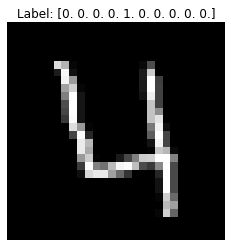

In [8]:
import matplotlib.pyplot as plt
index = 3
sample_image = X[index]
sample_label = y[index]

sample_image = sample_image.squeeze()  # Shape becomes (28, 28)

# Display the image
plt.imshow(sample_image, cmap='gray')
plt.title(f'Label: {sample_label}')
plt.axis('off')  # Hide axes
plt.show()

In [9]:
# Split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

In [11]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [12]:
# Train the model
history = model.fit(X_train, y_train,
                    validation_data=(X_val, y_val),
                    epochs=25,
                    batch_size=64)

Epoch 1/25
525/525 [==============================] - 18s 31ms/step - loss: 0.3195 - accuracy: 0.9021 - val_loss: 0.1277 - val_accuracy: 0.9590
Epoch 2/25
525/525 [==============================] - 17s 33ms/step - loss: 0.1029 - accuracy: 0.9674 - val_loss: 0.0882 - val_accuracy: 0.9721
Epoch 3/25
525/525 [==============================] - 17s 32ms/step - loss: 0.0696 - accuracy: 0.9772 - val_loss: 0.0718 - val_accuracy: 0.9777
Epoch 4/25
525/525 [==============================] - 21s 40ms/step - loss: 0.0561 - accuracy: 0.9816 - val_loss: 0.0675 - val_accuracy: 0.9792
Epoch 5/25
525/525 [==============================] - 19s 36ms/step - loss: 0.0460 - accuracy: 0.9860 - val_loss: 0.0572 - val_accuracy: 0.9831
Epoch 6/25
525/525 [==============================] - 23s 43ms/step - loss: 0.0363 - accuracy: 0.9885 - val_loss: 0.0572 - val_accuracy: 0.9830
Epoch 7/25
525/525 [==============================] - 24s 45ms/step - loss: 0.0305 - accuracy: 0.9900 - val_loss: 0.0498 - val_accuracy:

In [13]:
# Evaluate the model on the validation set
val_loss, val_accuracy = model.evaluate(X_val, y_val)
print(f'Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.4f}')

263/263 [==============================] - 2s 9ms/step - loss: 0.0666 - accuracy: 0.9863
Validation Loss: 0.0666, Validation Accuracy: 0.9863


In [14]:
# Predict on test data
test_predictions = model.predict(test_data)
test_predictions = np.argmax(test_predictions, axis=1)

875/875 [==============================] - 8s 9ms/step


In [15]:
submission = pd.DataFrame({'ImageId': np.arange(1, len(test_predictions) + 1), 'Label': test_predictions})
submission.to_csv('submission.csv', index=False)